In [18]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

x_train = np.load('x_train.npy')
x_test = np.load('x_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')


In [20]:
X, y = x_train, y_train
# X_scaled = X/max(X)
y_scaled = y/max(y)

scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(X)
MinMaxScaler(copy=True, feature_range=(-1, 1))
X_scaled = scaler.transform(X)

Epoch 1/10
4770/4770 [==============================] - 10s 2ms/step - loss: 17.8653
Epoch 2/10
4770/4770 [==============================] - 11s 2ms/step - loss: 14.6628
Epoch 3/10
4770/4770 [==============================] - 9s 2ms/step - loss: 13.3158
Epoch 4/10
4770/4770 [==============================] - 10s 2ms/step - loss: 12.8399
Epoch 5/10
4770/4770 [==============================] - 10s 2ms/step - loss: 12.6118
Epoch 6/10
4770/4770 [==============================] - 9s 2ms/step - loss: 12.5803
Epoch 7/10
4770/4770 [==============================] - 11s 2ms/step - loss: 12.5742
Epoch 8/10
4770/4770 [==============================] - 10s 2ms/step - loss: 12.5697
Epoch 9/10
4770/4770 [==============================] - 10s 2ms/step - loss: 12.5652
Epoch 10/10
4770/4770 [==============================] - 10s 2ms/step - loss: 12.5607


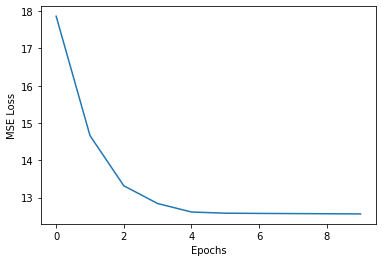

4770/4770 [==============================] - 10s 2ms/step


NameError: name 'mae' is not defined

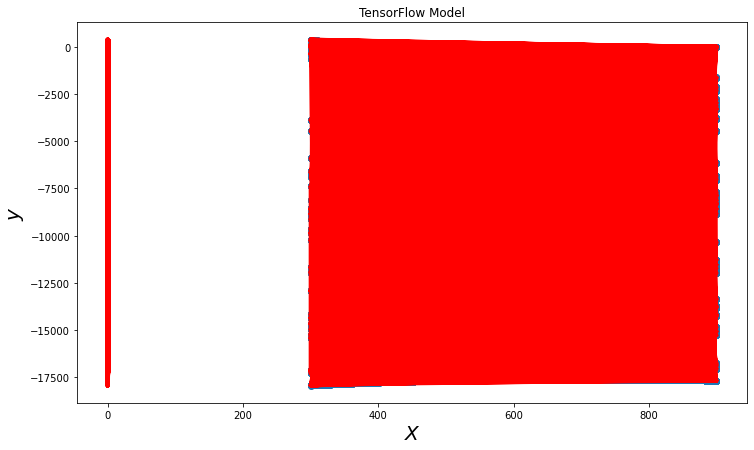

In [22]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[4])])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

model.compile(optimizer=optimizer, loss='mae')
tf_history = model.fit(X_scaled, y_scaled, epochs=10, verbose=True)

plt.plot(tf_history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show()

mse = tf_history.history['loss'][-1]
y_hat = model.predict(X)

plt.figure(figsize=(12,7))
plt.title('TensorFlow Model')
plt.scatter(X[:, 0], y, label='Data $(X, y)$')
plt.plot(X[:, ], y, color='red', label='Predicted Line $y = f(X)$',linewidth=4.0)
plt.xlabel('$X$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.text(0,0.70,'MSE = {:.3f}'.format(mae), fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (32, 1)                   5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
